<a href="https://colab.research.google.com/github/alifkrisnanda/RF-XGBOOST-Air-Quality-Prediction/blob/main/skripsi_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
file_path = "dataset_update.xlsx"
df = pd.read_excel(file_path)

In [ ]:
drop_columns = ["name", "datetime", "temp", "hum", "windgust", "windspeed", "winddir", "pm2.5", "pm10", "so2", "co", "03", "no2",]
df_cleaned = df.drop(columns=drop_columns, errors='ignore')

In [ ]:
print(df.head())

        name   datetime  pm2.5  pm10  so2  co    o3  no2  aqi
0  tangerang 2020-01-01     45    30    2  69  19.0    0  124
1  tangerang 2020-01-02     44    16    2  58  33.0    0  122
2  tangerang 2020-01-03     43    12    2  46  18.0    0  119
3  tangerang 2020-01-04     40     8    2  84  29.0    0  112
4  tangerang 2020-01-05     38     8    3  50   0.0    0  107


In [ ]:
print((df.info))

<bound method DataFrame.info of            name   datetime  pm2.5  pm10  so2  co    o3  no2  aqi
0     tangerang 2020-01-01     45    30    2  69  19.0    0  124
1     tangerang 2020-01-02     44    16    2  58  33.0    0  122
2     tangerang 2020-01-03     43    12    2  46  18.0    0  119
3     tangerang 2020-01-04     40     8    2  84  29.0    0  112
4     tangerang 2020-01-05     38     8    3  50   0.0    0  107
...         ...        ...    ...   ...  ...  ..   ...  ...  ...
1091  tangerang 2022-12-27     50    19   16  12   NaN    4  143
1092  tangerang 2022-12-28     51    20   16  12   NaN    4  143
1093  tangerang 2022-12-29     52    21   16  13   NaN    4  159
1094  tangerang 2022-12-30     53    22   17  13   NaN    4  159
1095  tangerang 2022-12-31     53    23   17  14   NaN    4  176

[1096 rows x 9 columns]>


# Preprocessing data

Cleaning dataset

In [ ]:
print("\nJumlah data yang hilang di setiap kolom:")
print(df.isnull().sum())


Jumlah data yang hilang di setiap kolom:
name         0
datetime     0
pm2.5        0
pm10         0
so2          0
co           0
o3          60
no2          0
aqi          0
dtype: int64


In [ ]:
df.isnull().sum()

,0
name,0
datetime,0
pm2.5,0
pm10,0
so2,0
co,0
o3,60
no2,0
aqi,0


In [ ]:
df_cleaned_dropnaAll = df.dropna()
df_cleaned_dropnaAll .isnull().sum()

,0
name,0
datetime,0
pm2.5,0
pm10,0
so2,0
co,0
o3,0
no2,0
aqi,0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
file_path = "dataset_update.xlsx"
df = pd.read_excel(file_path)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Convert 'datetime' column to numerical features
if 'datetime' in df.columns:
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)  # Set datetime as index
    # df['year'] = df.index.year
    # df['month'] = df.index.month
    # df['day'] = df.index.day
    # df['hour'] = df.index.hour

# Mengubah data kategorikal menjadi numerik jika ada
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Tentukan fitur dan target
X = df.drop(columns=['aqi'], errors='ignore')  # Pastikan hanya kolom numerik
y = df['aqi']  # Target variabel


# Data Split

In [ ]:
# Bagi data menjadi train dan test set
# Bagi data menjadi train dan test set tanpa shuffle agar datetime tetap berurutan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , shuffle=False, random_state=42)

In [ ]:
print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)

Ukuran data train: (876, 6)
Ukuran data test: (220, 6)


# Implementasi Random Forest

In [ ]:
# Model Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=75)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=75)

In [ ]:
# Prediksi
y_pred = rf.predict(X_test)

In [ ]:
# Membuat DataFrame hasil
result_dfrf = pd.DataFrame({
    'Index': y_test.index,
    'Actual_Value': y_test.values,
    'Predicted_Value': y_pred,
    'Deviation': y_pred - y_test.values
})
result_dfrf.set_index('Index', inplace=True)  # Set index kembali ke datetime
result_dfrf = result_dfrf.sort_index()  # Urutkan berdasarkan waktu

In [ ]:
# Cetak tabel hasil
print(result_dfrf.head(5))

            Actual_Value  Predicted_Value  Deviation
Index                                               
2022-05-26           122           122.12       0.12
2022-05-27           119           118.98      -0.02
2022-05-28           112           111.44      -0.56
2022-05-29           107           104.42      -2.58
2022-05-30           102           103.21       1.21


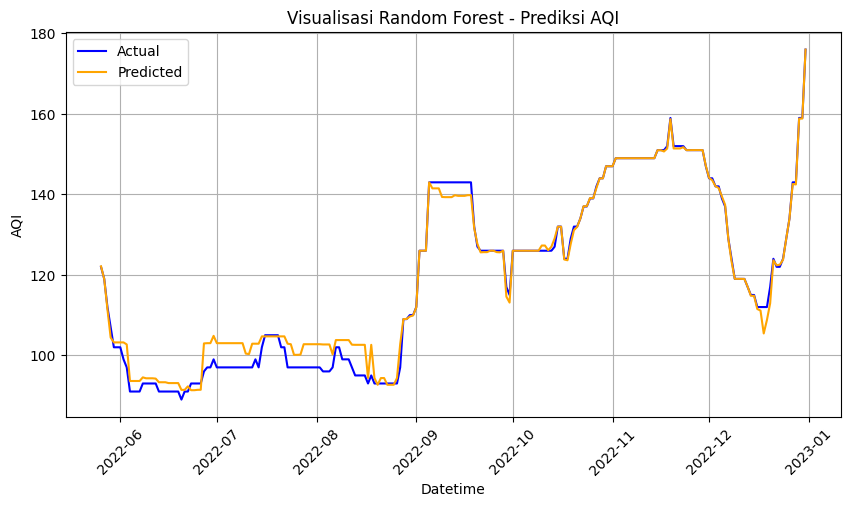

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.plot(result_dfrf.index, result_dfrf['Actual_Value'], label='Actual', color='blue')
plt.plot(result_dfrf.index, result_dfrf['Predicted_Value'], label='Predicted', color='orange')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('Visualisasi Random Forest - Prediksi AQI')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Hitung R² score
r2 = r2_score(y_test, y_pred)

# Konversi R² ke persen
r2_percent = r2 * 100

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2_percent:.2f}%")


Root Mean Squared Error (RMSE): 2.9110
R² Score: 98.23%


# Implementasi XGBoost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Model XGBoost
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    random_state=75,
    subsample=0.9999,
    colsample_bytree=1.0
)
# xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=60)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=75, ...)

In [ ]:
# Prediksi
y_pred = xgb_model.predict(X_test)

In [ ]:
# Membuat DataFrame hasil
result_dfxgb = pd.DataFrame({
    'Index': y_test.index,
    'Actual_Value': y_test.values,
    'Predicted_Value': y_pred,
    'Deviation': y_pred - y_test.values
})
result_dfxgb.set_index('Index', inplace=True)  # Set index kembali ke datetime
result_dfxgb = result_dfxgb.sort_index()  # Urutkan berdasarkan waktu

In [ ]:
# Cetak tabel hasil
pd.options.display.float_format = '{:.2f}'.format
print(result_dfxgb.head(5))

            Actual_Value  Predicted_Value  Deviation
Index                                               
2022-05-26           122           122.22       0.22
2022-05-27           119           118.94      -0.06
2022-05-28           112           111.30      -0.70
2022-05-29           107           111.27       4.27
2022-05-30           102           105.63       3.63


In [ ]:
# Cetak tabel hasil
pd.options.display.float_format = '{:.2f}'.format
print(result_dfxgb.tail(5))

            Actual_Value  Predicted_Value  Deviation
Index                                               
2022-12-27           143           141.56      -1.44
2022-12-28           143           142.17      -0.83
2022-12-29           159           159.75       0.75
2022-12-30           159           159.91       0.91
2022-12-31           176           176.02       0.02


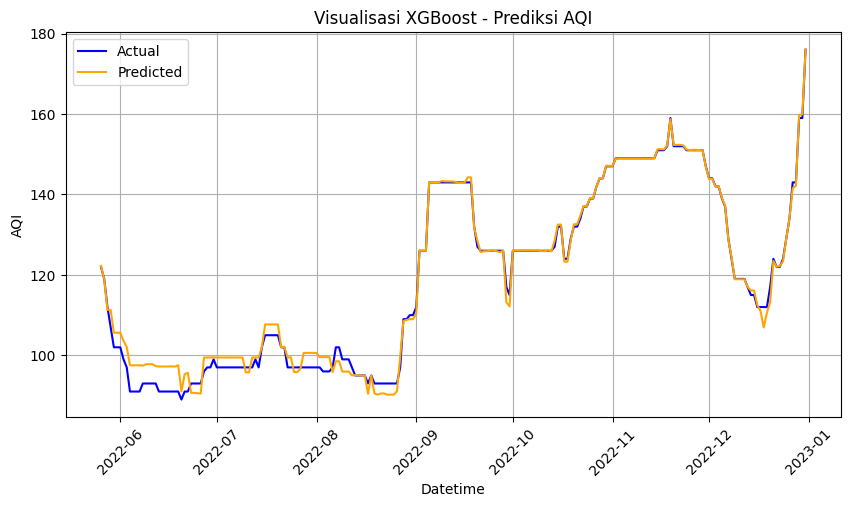

In [ ]:
#  Visualisasi hasil
plt.figure(figsize=(10, 5))
plt.plot(result_dfxgb.index, result_dfxgb['Actual_Value'], label='Actual', color='blue')
plt.plot(result_dfxgb.index, result_dfxgb['Predicted_Value'], label='Predicted', color='orange')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('Visualisasi XGBoost - Prediksi AQI')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Hitung R² score
r2 = r2_score(y_test, y_pred)

# Konversi R² ke persen
r2_percent = r2 * 100

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2_percent:.2f}%")

Root Mean Squared Error (RMSE): 2.3297
R² Score: 98.87%
